In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('orginal_sales_data_edit.csv', encoding='utf-8', header=0, delimiter=',')

#### Xóa dữ liệu rỗng

In [3]:
df.dropna(how='all', inplace=True)

#### Xóa dữ liệu trùng

In [4]:
df.drop_duplicates(subset=['ORDERNUMBER', 'ORDERDATE'], inplace=True)

#### Kiểm tra dữ liệu thiếu bằng chart

##### Trực quan hóa dữ liệu thiếu với Seaborn Heatmap

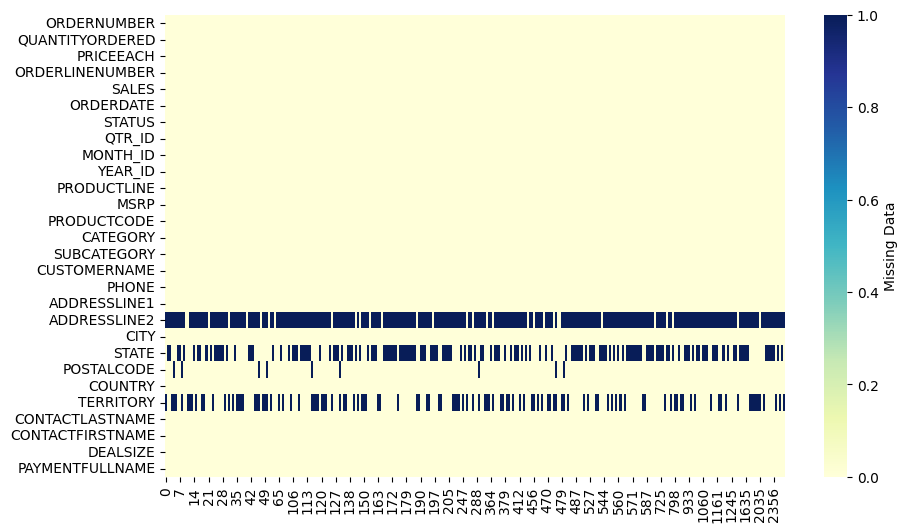

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap='YlGnBu', cbar_kws={'label': 'Missing Data'})
plt.savefig('my_missing_value_1.png', dpi=100)

##### Trực quan hóa dữ liệu thiếu với Seaborn Displot

<Figure size 1000x600 with 0 Axes>

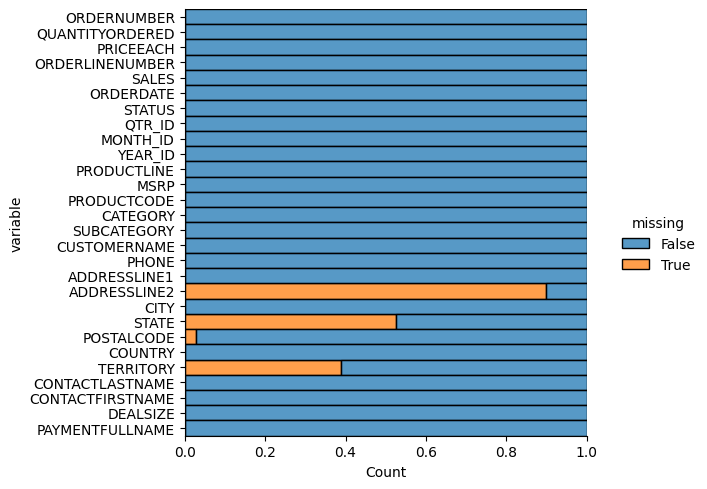

In [6]:
plt.figure(figsize=(10, 6))
sns.displot(data=df.isna().melt(value_name='missing'), y='variable', hue='missing', multiple='fill', aspect=1.25)
plt.savefig('my_missing_value_2.png', dpi=100)

#### Điền dữ liệu thiếu với dữ liệu định tính

In [7]:
df['ADDRESSLINE2'].fillna('Unknow', inplace=True)
df['STATE'].fillna('Unknow', inplace=True)
df['TERRITORY'].fillna('Unknow', inplace=True)
df['POSTALCODE'].fillna(0, inplace=True)

In [8]:
df.to_csv('processed_sales_data.csv', sep=',', encoding='utf-8', index=False)

#### Tách dòng PAYMENTFULLNAME thành PAYMENTLASTNAME và PAYMENTFIRSTNAME

In [9]:
df[['PAYMENTLASTNAME', 'PAYMENTFIRSTNAME']] = df['PAYMENTFULLNAME'].str.split(' ', expand=True)
df[['PAYMENTLASTNAME', 'PAYMENTFIRSTNAME']]

,PAYMENTLASTNAME,PAYMENTFIRSTNAME
0,Yu,Kwai
1,Henriot,Paul
2,DaCunha,Daniel
3,Young,Julie
4,Brown,Julie
...,...,...
2358,Thompson,Steve
2532,Roulet,Annette
2554,Taylor,Leslie
2692,Saavedra,Eduardo


#### Xóa 1 cột

In [10]:
df = df.drop('PAYMENTFULLNAME', axis=1)

#### Cho biết số lượng đơn hàng theo năm

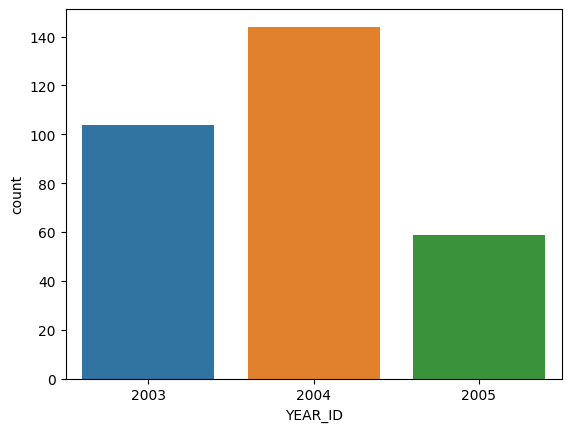

In [11]:
sns.countplot(x='YEAR_ID', data=df)
plt.show()

i

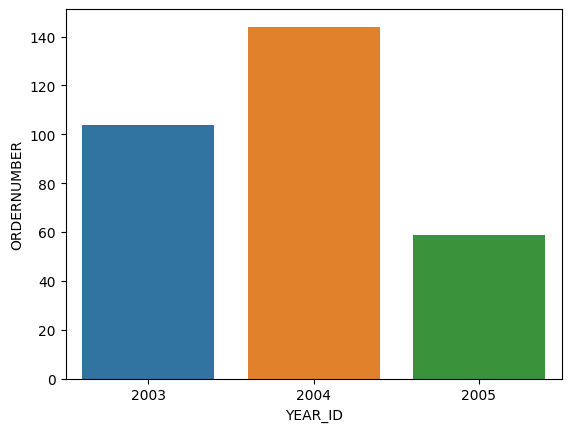

In [12]:
from statistics import mean, median
from numpy import count_nonzero
sns.barplot(x='YEAR_ID', y='ORDERNUMBER', data=df, errorbar=None, estimator=count_nonzero)
plt.show()

#### Cho biết tổng giá trị bán sản phẩm theo năm

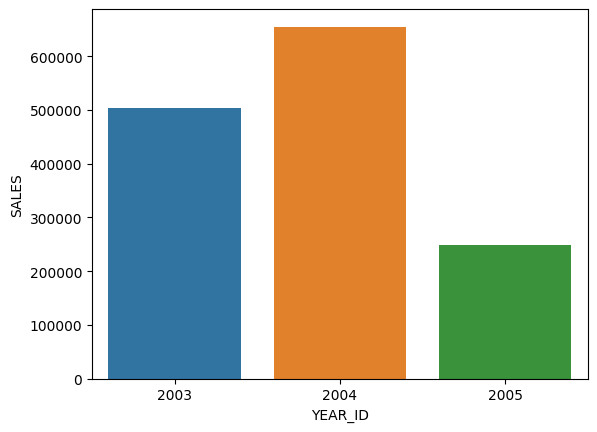

In [13]:
sns.barplot(x='YEAR_ID', y='SALES', data=df, errorbar=None, estimator=sum)
plt.show()

#### Tỷ lệ số đơn hàng theo DEALSIZE

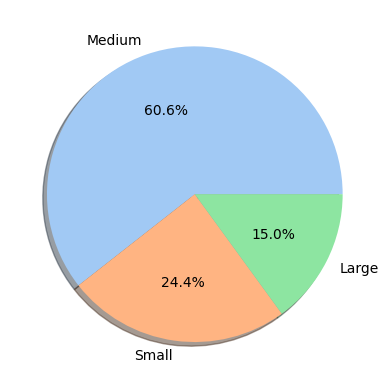

In [14]:
labels = df['DEALSIZE'].value_counts().index
values = df['DEALSIZE'].value_counts().values
colors = sns.color_palette('pastel')
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.show()

#### Hãy cho biết tổng giá trị SALES theo ngày

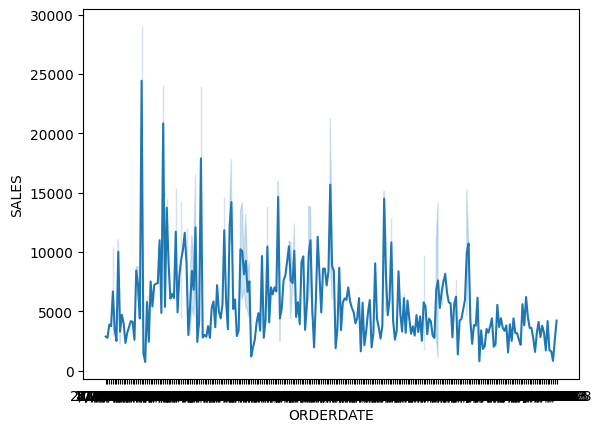

In [15]:
sns.lineplot(x='ORDERDATE', y='SALES', data=df, estimator=sum)
plt.show()

#### Hãy cho biết tổng lượng SALES trung bình theo tháng và năm

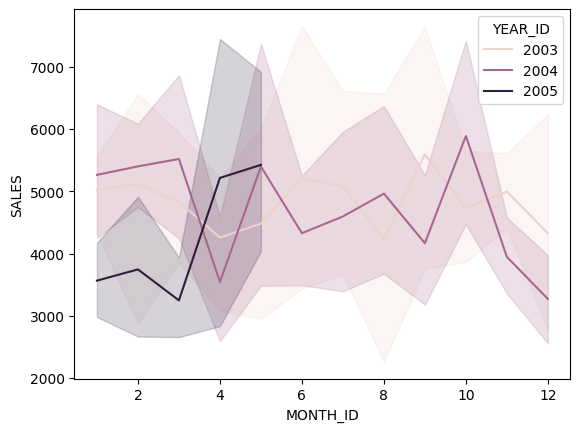

In [16]:
sns.lineplot(x='MONTH_ID', y='SALES', hue='YEAR_ID', data=df)
plt.show()

#### Hãy cho biết tổng giá trị SALES theo tháng và năm

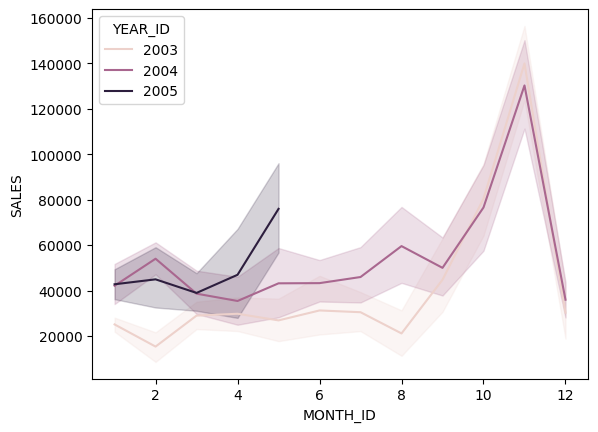

In [17]:
sns.lineplot(x='MONTH_ID', y='SALES', hue='YEAR_ID', data=df, estimator=sum)
plt.show()

#### Hãy cho biết số trạng thái đơn  hàng (STATUS) theo năm

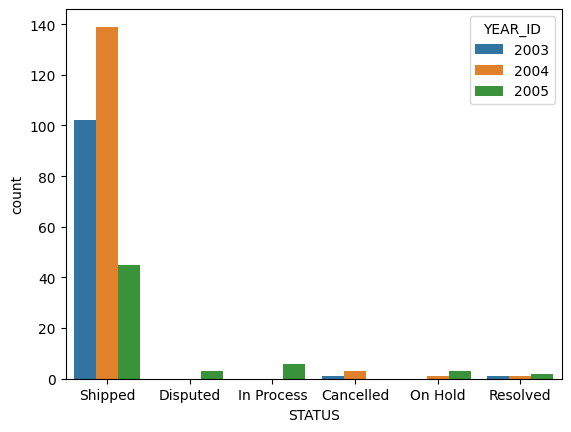

In [18]:
sns.countplot(x='STATUS', hue='YEAR_ID', data=df)
plt.show()

##### Hãy cho biết trung bình giá trị đơn hàng theo trạng thái (STATUS) theo nhóm các năm (YEAR_ID)

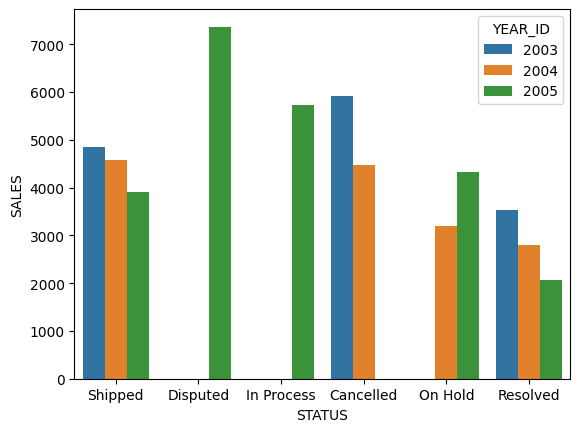

In [19]:
sns.barplot(x='STATUS', y='SALES', hue='YEAR_ID', data=df, errorbar=None)
plt.show()

#### Hãy cho biết số lượng hóa đơn giữa các nhóm DEALSIZE theo YEAR_ID

In [20]:
gp = df.groupby

#### Mô tả dữ liệu của QUANTITYORDERED

In [21]:
df['QUANTITYORDERED'].describe()

count    307.000000
mean      35.205212
std       10.431550
min        6.000000
25%       27.000000
50%       35.000000
75%       43.000000
max       97.000000
Name: QUANTITYORDERED, dtype: float64

#### Mô tả dữ liệu của QUANTIRYORDERED, PRICEEACH, SALES

In [22]:
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].describe()

,QUANTITYORDERED,PRICEEACH,SALES
count,307.000000,307.000000,307.000000
mean,35.205212,93.351596,4588.486906
std,10.431550,14.912985,2142.986902
min,6.000000,34.910000,553.950000
25%,27.000000,96.915000,3010.500000
50%,35.000000,100.000000,4196.800000
75%,43.000000,100.000000,5855.460000
max,97.000000,100.000000,12001.000000


#### Mô tả dữ liệu của SALES theo nhóm DEALSIZE

In [23]:
df.groupby('DEALSIZE')['SALES'].describe()

,count,mean,std,min,25%,50%,75%,max
DEALSIZE,,,,,,,,
Large,46.0,8374.474783,1311.082806,7016.31,7340.320,8014.82,9008.0450,12001.00
Medium,186.0,4617.631290,1060.525537,3003.00,3759.165,4402.06,5500.4125,6934.62
Small,75.0,2194.136267,640.637657,553.95,1705.020,2333.12,2738.3000,2992.00


#### Vẽ biểu đồ Histogram của QUANTITYORDERED

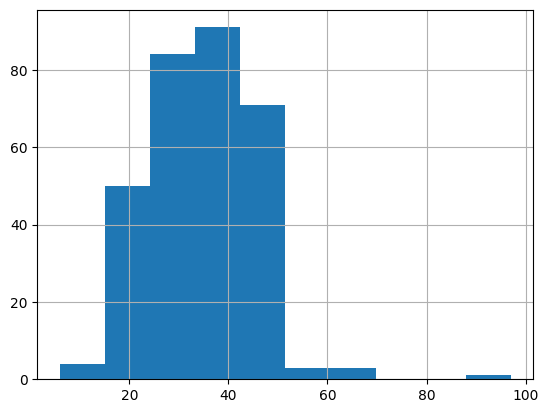

In [24]:
df['QUANTITYORDERED'].hist()
plt.show()

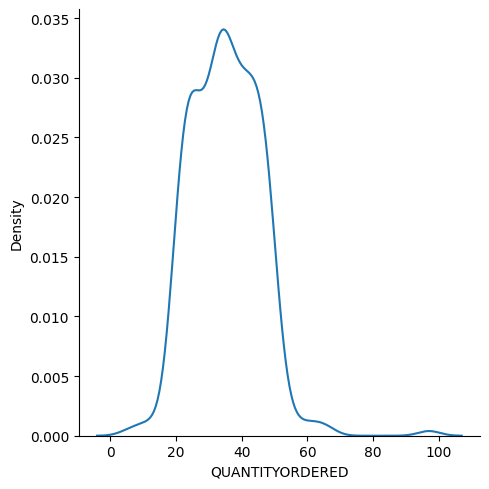

In [25]:
sns.displot(df, x='QUANTITYORDERED', kind='kde')
plt.show()

#### Vẽ biểu đồ Histogram của QUANTITYORDERED theo DEALSIZE

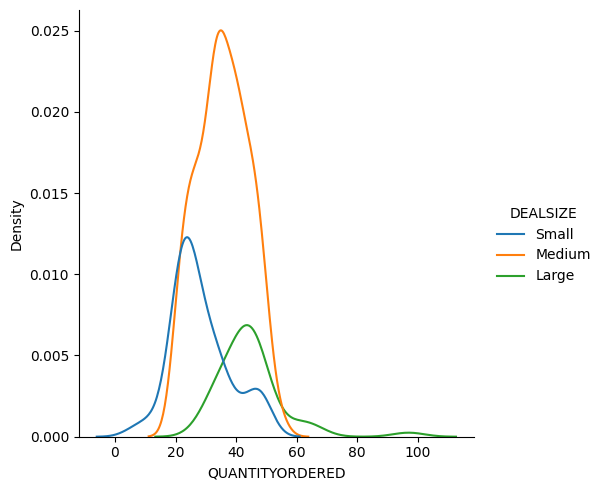

In [26]:
sns.displot(df, x='QUANTITYORDERED', hue='DEALSIZE', kind='kde')
plt.show()

#### Vẽ biểu đồ JoinPlot của QUANTITYORDERED và PRICEEACH

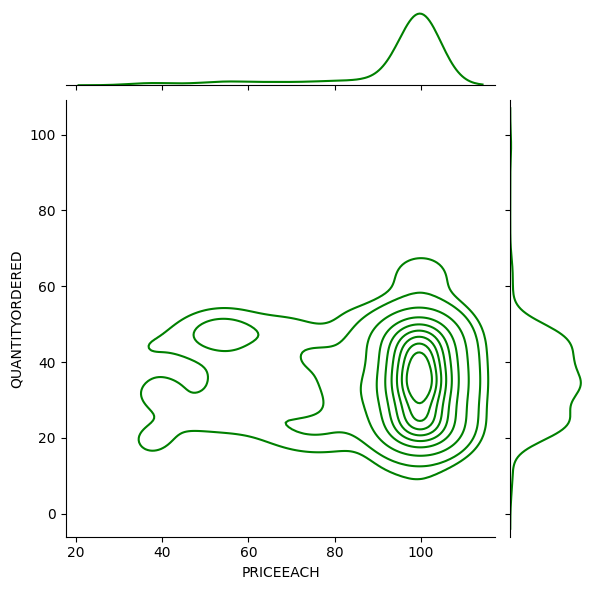

In [27]:
sns.jointplot(data=df, x='PRICEEACH', y='QUANTITYORDERED', kind='kde', color='g')
plt.show()

#### Vẽ biểu đồ PairPlot của QUANTITYORDERED, PRICEEACH, SALES

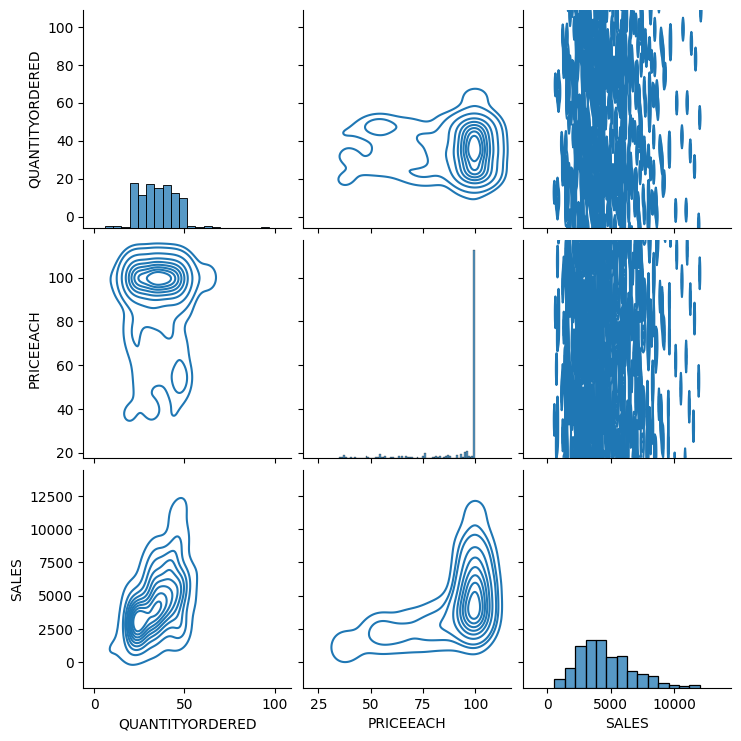

In [28]:
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']], diag_kind='hist', kind='kde')
plt.show()

#### Phân phối (PairPlot, Histogram) của QUANTITYORDERED, PRICEEACH, SALES theo nhóm DEALSIZE

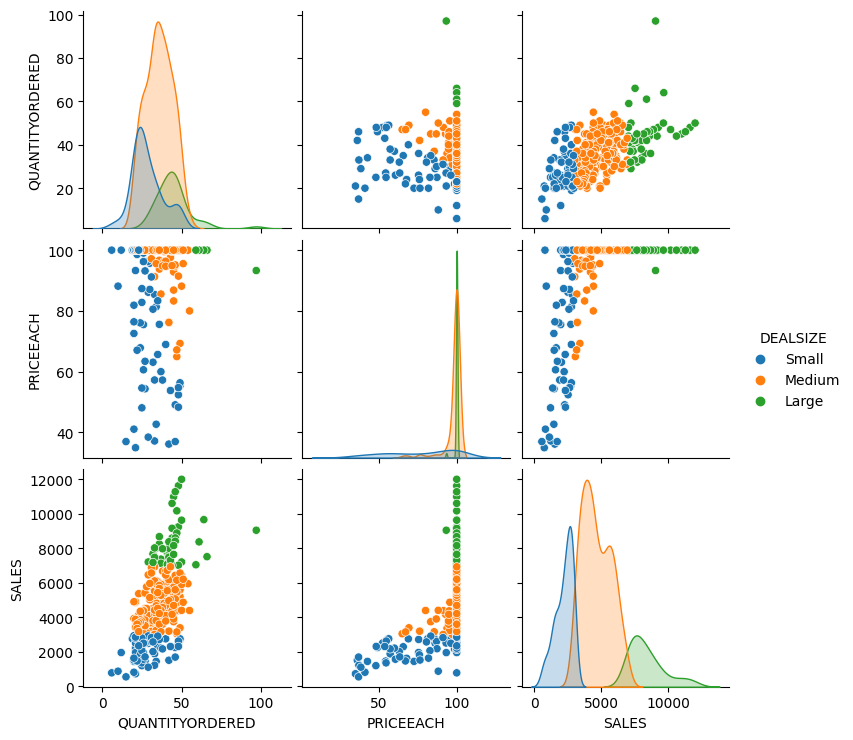

In [29]:
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DEALSIZE']], hue='DEALSIZE')
plt.show()

#### Hãy trực quan số lượng sản phẩm phân phối theo năm của QUANTITYORDERED (catplot)

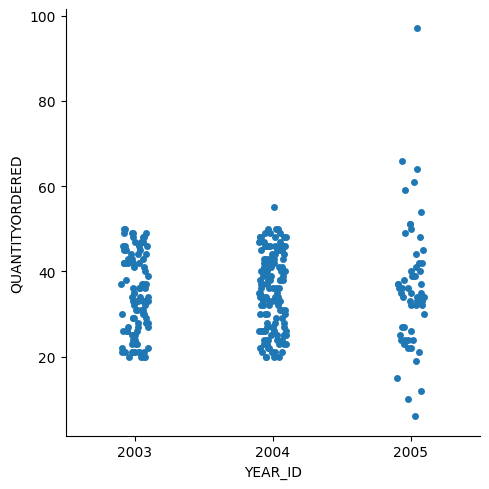

In [30]:
sns.catplot(x='YEAR_ID', y='QUANTITYORDERED', data=df)
plt.show()

#### Hãy trực quan số lượng sản phẩm phân phối theo năm của QUANTITYORDERED

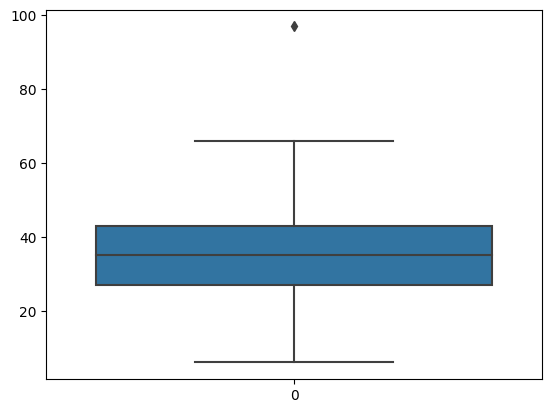

In [31]:
sns.boxplot(data= df['QUANTITYORDERED'])
plt.show()

#### Biểu diễn (Boxplot, Violin) của QUANTITYORDERED trên cùng chart

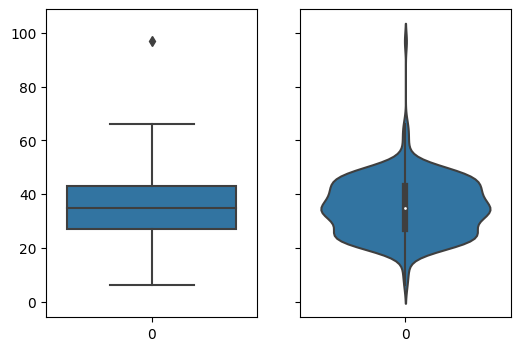

In [32]:
_, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['QUANTITYORDERED'], ax=axes[0])
sns.violinplot(data=df['QUANTITYORDERED'], ax=axes[1])
plt.show()

#### Biểu diễn (Boxplot) của QUANTITYORDERED theo nhóm DEALSIZE

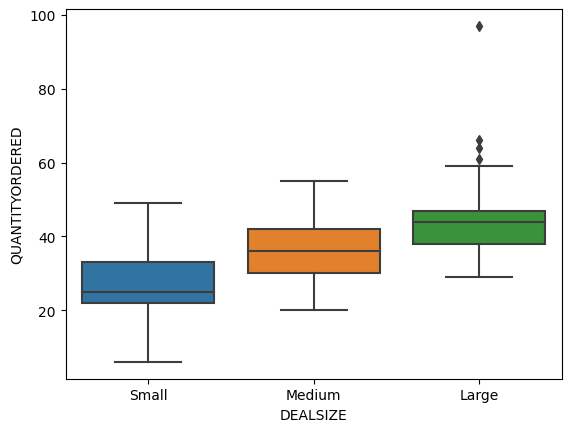

In [33]:
sns.boxplot(x='DEALSIZE', y='QUANTITYORDERED', data=df)
plt.show()

#### Biểu diễn (Boxplot) của QUANTITYORDERED, PRICEEACH

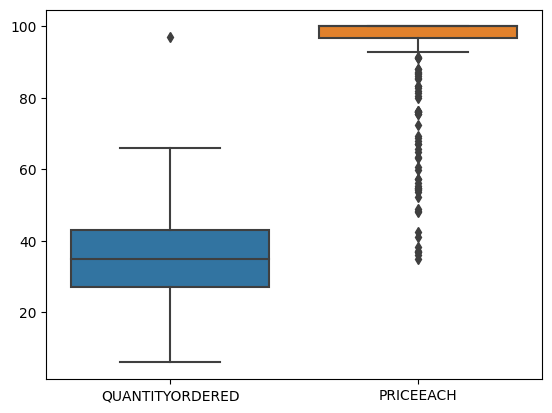

In [34]:
sns.boxplot(data=df[['QUANTITYORDERED', 'PRICEEACH']])
plt.show()

#### Độ xiên của phân phối (Skew) của QUANTITYORDERED, PRICEEACH

In [35]:
df[['QUANTITYORDERED', 'PRICEEACH']].skew()

QUANTITYORDERED    0.708820
PRICEEACH         -2.424483
dtype: float64

#### Độ nhọn của phân phối (Kutorsis) của QUANTITYORDERED, PRICEEACH

In [36]:
df[['QUANTITYORDERED', 'PRICEEACH']].kurtosis()

QUANTITYORDERED    3.218123
PRICEEACH          4.959410
dtype: float64

#### Kiểm tra tính chuẩn (Normal distribution) của QUANTITYORDERED, PRICEEACH, SALES

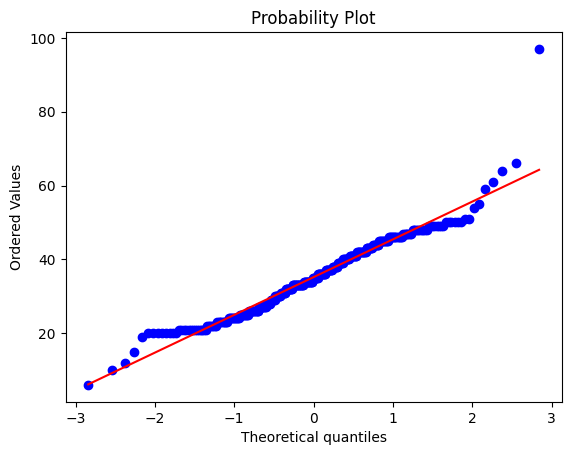

In [38]:
from scipy import stats
stats.probplot(df['QUANTITYORDERED'], plot=sns.mpl.pyplot)
plt.show()

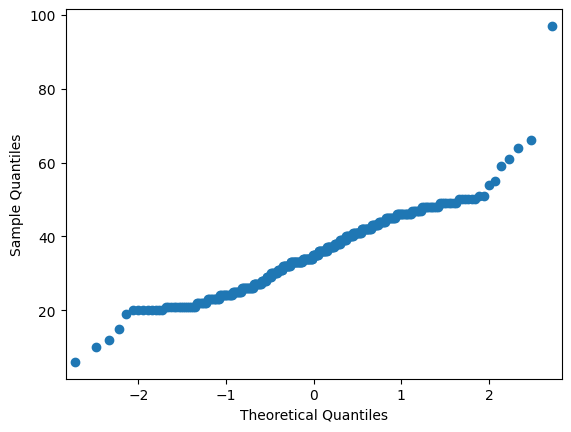

In [41]:
import statsmodels.api as sm
sm.qqplot(df['QUANTITYORDERED'])
plt.show()

#### Transform dữ liệu và kiểm thử Normality của biến TRANSFORMEDQUANTITYORDERED

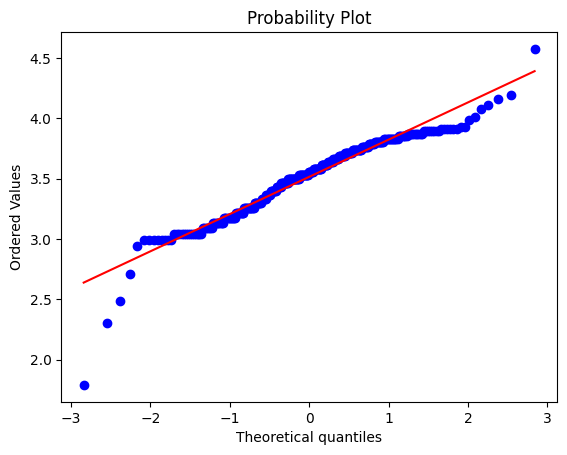

In [42]:
import numpy as np
df[['TRANSFORMEDQUANTITYORDERED']] = df[['QUANTITYORDERED']].transform(func=lambda x : np.log(x))
stats.probplot(df['TRANSFORMEDQUANTITYORDERED'], plot=sns.mpl.pyplot)
plt.show()

#### Hãy thực hiện Normalize dữ liệu TRANSFORMEDQUANTITYORDERED

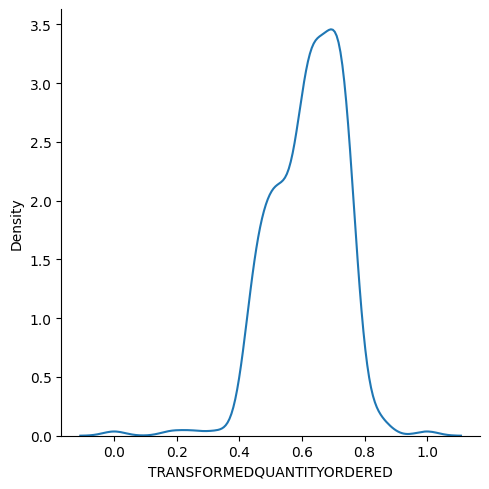

In [43]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df[['TRANSFORMEDQUANTITYORDERED']] = min_max_scaler.fit_transform(df[['TRANSFORMEDQUANTITYORDERED']])
sns.displot(df, x='TRANSFORMEDQUANTITYORDERED', kind='kde')
plt.show()

#### Hãy thực hiện standardization dữ liệu TRANSFORMEDQUANTITYORDERED

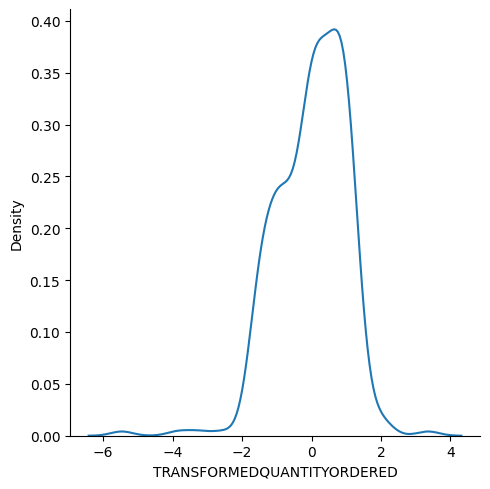

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['TRANSFORMEDQUANTITYORDERED']] = scaler.fit_transform(df[['TRANSFORMEDQUANTITYORDERED']])
# or
# df['TRANSFORMEDQUANTITYORDERED'] = stats.zscore(df['TRANSFORMEDQUANTITYORDERED'])
# stats.zscore(df['TRANSFORMEDQUANTITYORDERED'])

sns.displot(df, x='TRANSFORMEDQUANTITYORDERED', kind='kde')
plt.show()

#### Ma trận tương quan tuyến tính (Pearson) của các tập QUANTITYORDERED, PRICEEACH, SALES

In [46]:
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr()

,QUANTITYORDERED,PRICEEACH,SALES
QUANTITYORDERED,1.000000,-0.002066,0.567122
PRICEEACH,-0.002066,1.000000,0.512066
SALES,0.567122,0.512066,1.000000


In [47]:
df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].cov()

,QUANTITYORDERED,PRICEEACH,SALES
QUANTITYORDERED,108.817228,-0.321342,1.267783e+04
PRICEEACH,-0.321342,222.397110,1.636478e+04
SALES,12677.834199,16364.780747,4.592393e+06


#### Vẽ biểu đồ Heatmap tương quan của các tập QUANTITYORDERED, PRICEEACH, SALES

In [ ]:
sns.heatmap(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr(), vmax=1.0, square=False).xaxis.